In [145]:
from ucimlrepo import fetch_ucirepo 

# faz o fetch do dataset 
dataset = fetch_ucirepo(id=109)

# dados (pandas dataframes) 
X = dataset.data.features 
y = dataset.data.targets 
X

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [146]:
y

,class
0,1
1,1
2,1
3,1
4,1
...,...
173,3
174,3
175,3
176,3


In [147]:
y['quality'].unique()

KeyError: 'quality'

In [148]:
X.isna().sum()


Alcohol                         0
Malicacid                       0
Ash                             0
Alcalinity_of_ash               0
Magnesium                       0
Total_phenols                   0
Flavanoids                      0
Nonflavanoid_phenols            0
Proanthocyanins                 0
Color_intensity                 0
Hue                             0
0D280_0D315_of_diluted_wines    0
Proline                         0
dtype: int64

In [149]:
X.isna().any()

Alcohol                         False
Malicacid                       False
Ash                             False
Alcalinity_of_ash               False
Magnesium                       False
Total_phenols                   False
Flavanoids                      False
Nonflavanoid_phenols            False
Proanthocyanins                 False
Color_intensity                 False
Hue                             False
0D280_0D315_of_diluted_wines    False
Proline                         False
dtype: bool

In [150]:
X.isnull().sum()

Alcohol                         0
Malicacid                       0
Ash                             0
Alcalinity_of_ash               0
Magnesium                       0
Total_phenols                   0
Flavanoids                      0
Nonflavanoid_phenols            0
Proanthocyanins                 0
Color_intensity                 0
Hue                             0
0D280_0D315_of_diluted_wines    0
Proline                         0
dtype: int64

In [151]:
atributos_object = X.dtypes == 'object'
print(atributos_object)

Alcohol                         False
Malicacid                       False
Ash                             False
Alcalinity_of_ash               False
Magnesium                       False
Total_phenols                   False
Flavanoids                      False
Nonflavanoid_phenols            False
Proanthocyanins                 False
Color_intensity                 False
Hue                             False
0D280_0D315_of_diluted_wines    False
Proline                         False
dtype: bool


In [152]:
from sklearn.preprocessing import StandardScaler

for atributo in X.columns:
    X[atributo] = StandardScaler().fit_transform(X[[atributo]])
X

/tmp/ipykernel_6438/1184622624.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[atributo] = StandardScaler().fit_transform(X[[atributo]])
/tmp/ipykernel_6438/1184622624.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[atributo] = StandardScaler().fit_transform(X[[atributo]])
/tmp/ipykernel_6438/1184622624.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


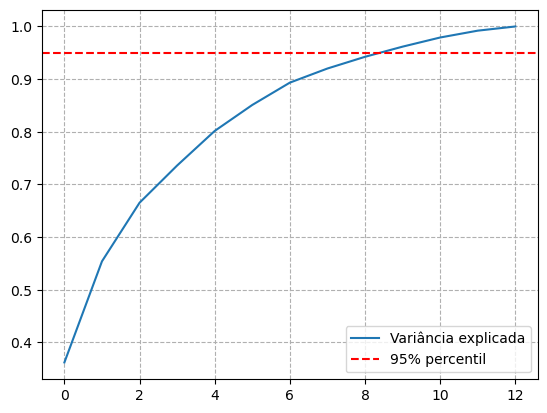

In [153]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_), label='Variância explicada')
plt.axhline(0.95, color='red', linestyle='--', label='95% percentil')
plt.grid(True, linestyle='--')
plt.legend()

In [154]:
pca   = PCA(n_components=9)
X_pca = pca.fit_transform(X)

X_pca

array([[ 3.31675081e+00,  1.44346263e+00, -1.65739045e-01, ...,
         5.96426546e-01, -6.51390947e-02, -6.41442706e-01],
       [ 2.20946492e+00, -3.33392887e-01, -2.02645737e+00, ...,
         5.37756128e-02, -1.02441595e+00,  3.08846753e-01],
       [ 2.51674015e+00,  1.03115130e+00,  9.82818670e-01, ...,
         4.24205451e-01,  3.44216131e-01,  1.17783447e+00],
       ...,
       [-2.67783946e+00,  2.76089913e+00, -9.40941877e-01, ...,
         6.79235406e-01, -4.70238043e-02, -1.22214687e-03],
       [-2.38701709e+00,  2.29734668e+00, -5.50696197e-01, ...,
         6.33975271e-01, -3.90828774e-01, -5.74476725e-02],
       [-3.20875816e+00,  2.76891957e+00,  1.01391366e+00, ...,
         5.74125710e-03,  2.92913734e-01, -7.41660423e-01]])

In [155]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=99)
# X_train.shape
y_train.shape

(142, 1)

In [156]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


classificadores = {
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'DT' : DecisionTreeClassifier(),
    'RF' : RandomForestClassifier(),
    'LR' : LogisticRegression(),
    'NB' : GaussianNB()
}

In [157]:
import time
acuracia_treino = {}
tempo_treino    = {}

for clf in classificadores:
    start_time = time.process_time()
    classificadores[clf].fit(X_train, y_train.to_numpy().flatten())
    acuracia_treino[clf] = classificadores[clf].score(X_train, y_train.to_numpy().flatten())
    tempo_treino[clf]    = time.process_time() - start_time

Text(0.5, 1.0, 'Tempo Treinamento')

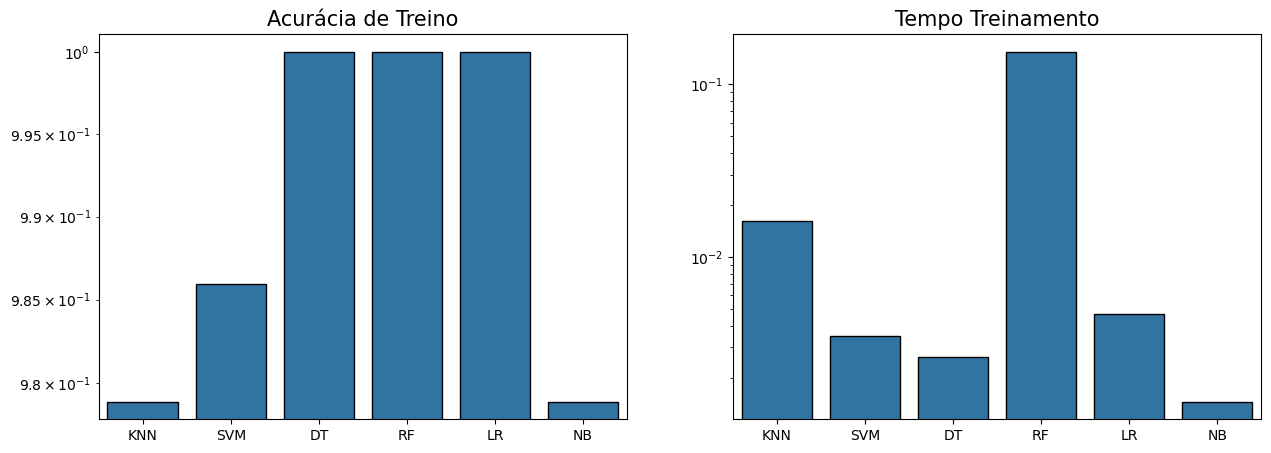

In [158]:
import seaborn as sns
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.barplot(x=list(acuracia_treino.keys()), y=list(acuracia_treino.values()), ax=ax[0], ec='k')
sns.barplot(x=list(tempo_treino.keys()), y=list(tempo_treino.values()), ax=ax[1], ec='k')

ax[0].set_yscale('log')
ax[0].set_title('Acurácia de Treino', size=15)

ax[1].set_yscale('log')
ax[1].set_title('Tempo Treinamento', size=15)

In [159]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

metricas = {}

for clf in classificadores:
    metricas[clf] = {}
    classificadores[clf].fit(X_train, y_train.to_numpy().flatten())
    predictions   = classificadores[clf].predict(X_test)
    metricas[clf]['accuracy']  = accuracy_score(y_test.to_numpy().flatten(), predictions)
    metricas[clf]['precision'] = precision_score(y_test.to_numpy().flatten(), predictions, average='micro')
    metricas[clf]['recall']    = recall_score(y_test.to_numpy().flatten(), predictions, average='micro')
    metricas[clf]['f1']        = f1_score(y_test.to_numpy().flatten(), predictions, average='micro')

resultado = pd.DataFrame(metricas)

In [160]:
list(classificadores[clf].classes_)

[1, 2, 3]

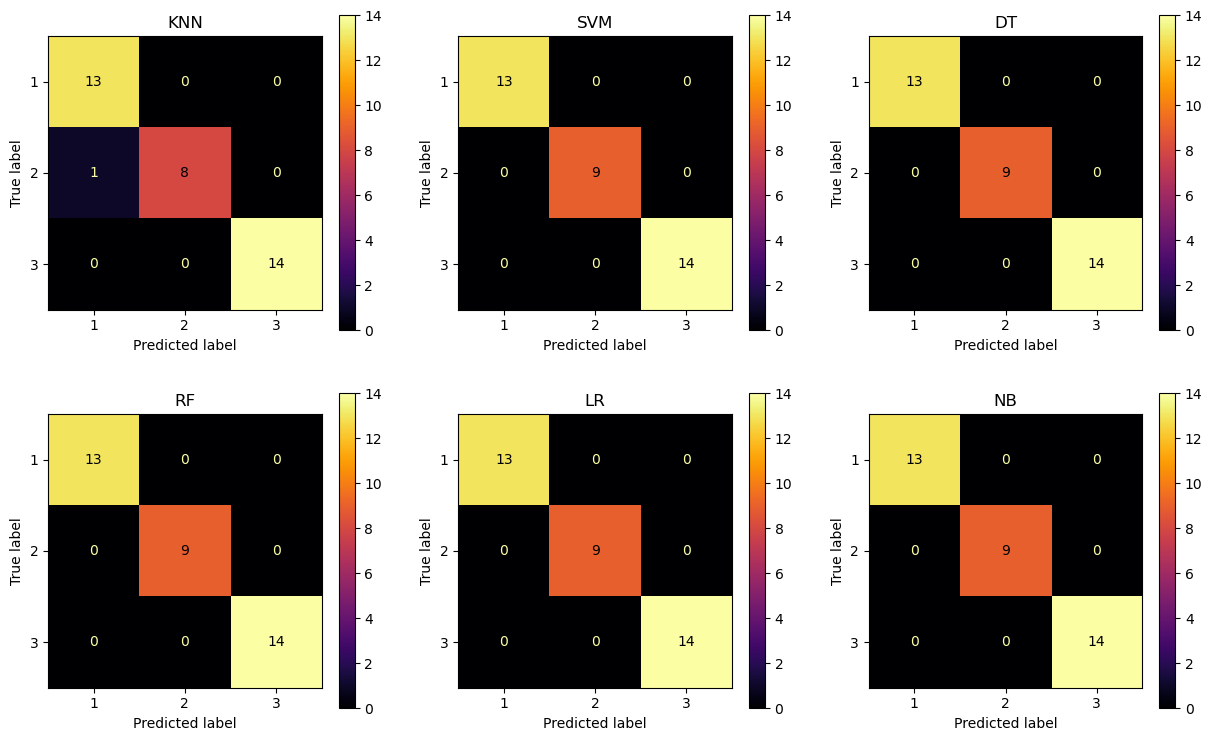

In [161]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 9))
ax      = ax.flatten()

for idx, clf in enumerate(classificadores):
    predictions = classificadores[clf].predict(X_test)
    cm = confusion_matrix(y_test.to_numpy().flatten(), predictions, labels=classificadores[clf].classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classificadores[clf].classes_, )
    disp.plot(ax=ax[idx], cmap='inferno') 
    ax[idx].set_title(clf)

Text(0, 0.5, 'Acurácia média')

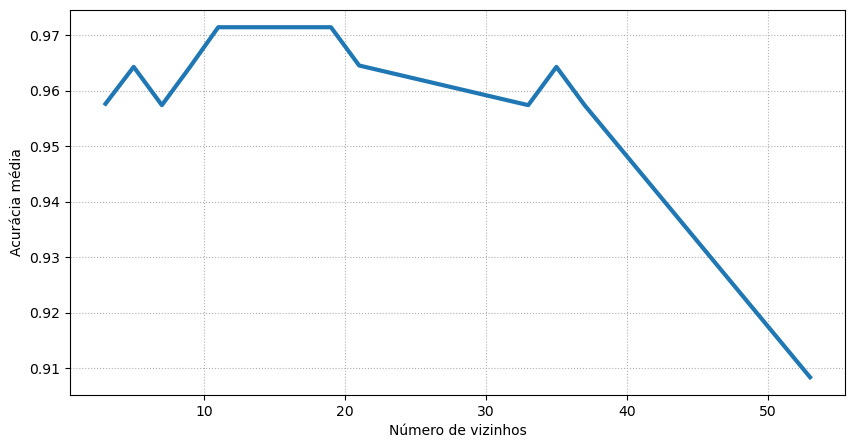

In [162]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

ks   = [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 37, 33, 35, 53]
accs = []

for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train.to_numpy().flatten())
    scores = cross_val_score(knn, X_train, y_train.to_numpy().flatten(), cv=5)
    accs.append(scores.mean())

fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(x=ks, y=accs, linewidth=3, ax=ax)
plt.grid(True, linestyle=':')
plt.xlabel('Número de vizinhos')
plt.ylabel('Acurácia média')

In [163]:
from sklearn.decomposition import PCA
import seaborn as sns

pca       = PCA(n_components=2)
dados_pca = pca.fit_transform(X)

x_treino, x_teste, y_treino, y_teste = train_test_split(dados_pca, y, test_size=0.2, random_state=99, shuffle=True)

/usr/local/lib64/python3.13/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib64/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib64/python3.13/site-packages/sklearn/base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib64/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ),

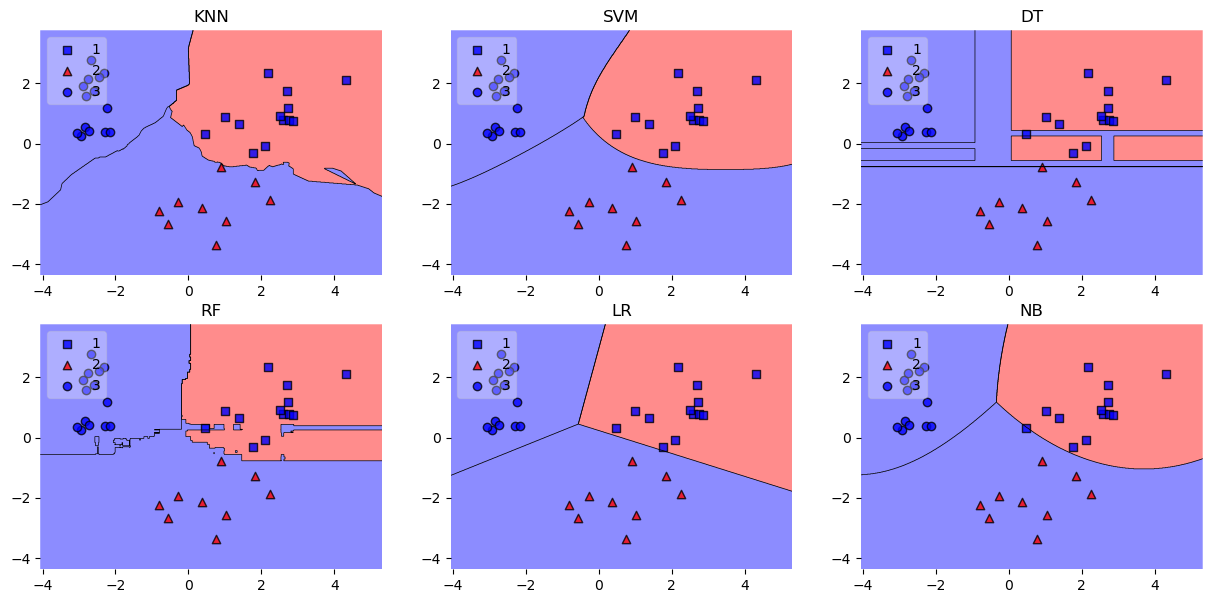

In [164]:
from mlxtend.plotting import plot_decision_regions

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 7))
ax      = ax.flatten()

for idx, clf in enumerate(classificadores):
    classificadores[clf].fit(x_treino, y_treino)
    plot_decision_regions(x_teste, y_teste.to_numpy().flatten(), clf=classificadores[clf], 
                          legend=2, ax=ax[idx], colors='blue,red')
    ax[idx].set_title(clf)